# All Things Bayes -All of the Time ( Probably ¯\\\_(ツ)\_/¯ )

Bayesian ideas can be quite useful. See:

<center><img src='https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png'></center>

In this notebook we will learn how to use Bayesian reasoning to understand the world, explore our data, and -eventually- for modeling.

## Bayes' Theorem

* See: https://en.wikipedia.org/wiki/Bayes%27_theorem

*Statement of the theorem:*

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \, ,
$$
where $A$ and $B$ are events such that $P(B) \neq 0$.

*Proof:*

Recall that

$$
P(A|B) = \frac{P(A \cap B)}{P(B)} \quad \textrm{and} \quad P(B|A) = \frac{P(B \cap A)}{P(A)} \, .
$$

Solving the second equation for $P(A \cap B)$ yields

$$
P(A \cap B) = P(B \cap A) = P(B|A) \cdot P(A) \, .
$$

Making this subsitution in the first equation yields 

$$
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(B|A)P(A)}{P(B)} \, .
$$

Q.E.D.

## Terminology

* $P(A)$ : 
    * The probability of an event irrespective of the outcomes of other random variables is called the ***marginal probability***.
    * In reference to Bayes' Theorem, this is known as the ***prior probability***.


* $P(A,B)$ or $P(A \cap B)$ :
    * The probability of two (or more) simultaneous events is called the ***joint probability***.
    * Note: $P(A, B) = P(A|B)\cdot P(B)$.


* $P(A|B)$ :
    * The probability of one (or more) event(s) given the occurence of another event is called the ***conditional probability***.
    * In reference to Bayes' Theorem, this is known as the ***posterior probability***.


* $P(B|A)$ : ***Likelihood***.

* $P(B)$ : ***Evidence***.

This allows us to restate the theorem as

$$
\textrm{Posterior} = \frac{\textrm{Likelihood}\cdot\textrm{Prior}}{\textrm{Evidence}}
$$

## Examples

_____

* *Q:* 
What is the probability that there is rain given that there are clouds?

$$
P(\textrm{ Rain }|\textrm{ Clouds }) = \frac{P(\textrm{ Clouds }|\textrm{ Rain })\cdot P(\textrm{ Rain })}{P(\textrm{ Clouds })}
$$

_____

* *Q:* 
What is the probability that there is fire given that there is smoke?

$$
P(\textrm{ Fire }|\textrm{ Smoke }) = \frac{P(\textrm{ Smoke }|\textrm{ Fire })\cdot P(\textrm{ Fire })}{P(\textrm{ Smoke })}
$$

_____

* *Q:* 
What is the probability that you have cancer given that you tested positive?

$$
P(\textrm{ Cancer }|\textrm{ Positive }) = \frac{P(\textrm{ Positive }|\textrm{ Cancer })\cdot P(\textrm{ Cancer })}{P(\textrm{ Positive })}
$$

_____

<center><img src='https://imgs.xkcd.com/comics/seashell.png'></center>

## Naive Bayes

* See: https://scikit-learn.org/stable/modules/naive_bayes.html

Let's ***try*** to build our first classifier!

<center><img src='https://pics.me.me/do-or-do-not-there-is-no-try-phorvater-boomer-65574877.png'></center>

We will do this on a very popular toy-dataset.

In [69]:
# plotting
import scikitplot as skplt
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# data
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

# modeling
from sklearn.naive_bayes import GaussianNB
from sklego.mixture import GMMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklego.meta import Thresholder
from sklearn.pipeline import make_pipeline

# garbage
import gc; gc.enable()

# warnings
import warnings
warnings.filterwarnings("ignore")

In [70]:
# make toy-dataset
n = 5000
X, y = make_moons(n, random_state=42)

# noise injection
X = X + np.random.normal(0, 0.1, (n, 2))

# cast a dataframe object
df = pd.DataFrame(X, columns=['x', 'y'])
target = 'MOON'
df[target] = y

# quick-look
df.sample(8)

x         y  MOON
1668  1.256607 -0.492244     1
3769  0.830358 -0.344081     1
348  -0.863308  0.453121     0
2847  1.032609 -0.412425     1
558   1.887419  0.299969     1
1526  1.491112 -0.509411     1
2180  1.501784 -0.395687     1
2342  0.060823  1.018509     0

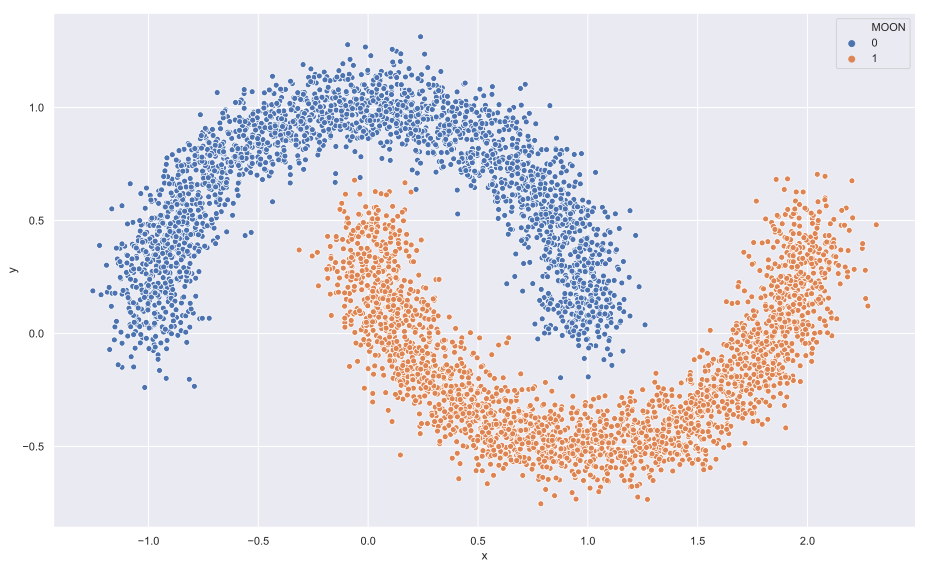

In [71]:
SIZE = (13,8)
plt.figure(figsize=SIZE)
sns.scatterplot(x=df.x, y=df.y,
                hue=df[target])
plt.tight_layout()
plt.show()

<center><img src='https://pics.me.me/thats-no-moon-its-a-space-station-snape-19231142.png'></center>

In [72]:
# create a hold-out set for testing
X_train, X_test, y_train, y_test = train_test_split(df[['x','y']], df[target], 
                                                    test_size=0.25, 
                                                    random_state=42)

In [73]:
# instantiate our model
model = GaussianNB()

# train the model
model.fit(X_train, y_train)

# make predictions on training set
y_guess = model.predict(X_train)

# make predictions on hold-out set
y_score = model.predict(X_test)

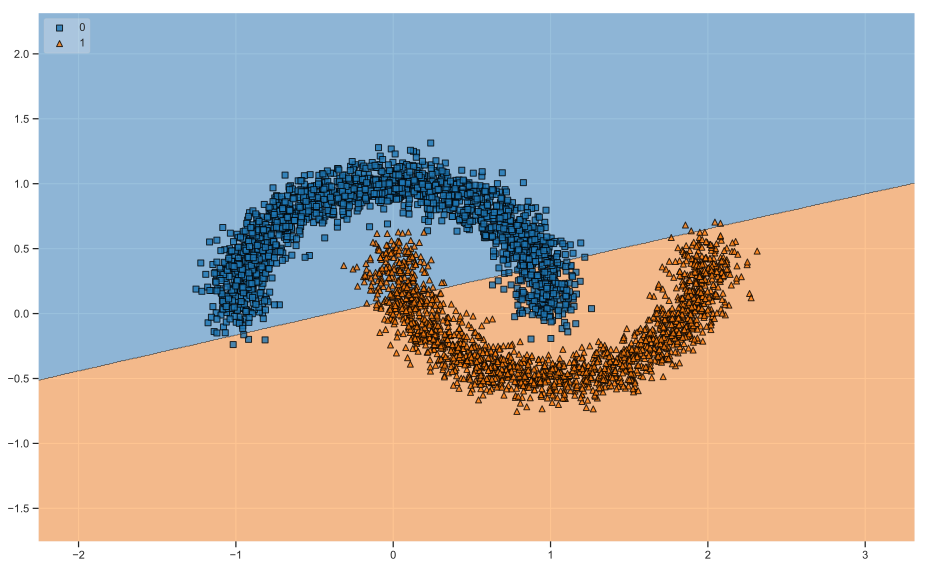

In [74]:
# plot the learned decision boundary
plt.figure(figsize=SIZE)
plot_decision_regions(X=X_train.values, y=y_train.values, clf=model, legend=2)
plt.tight_layout()
plt.show()

In [75]:
print("Accuracy Scores")
print("="*len("Accuracy Scores"))
print("TRAIN:",accuracy_score(y_train, y_guess))
print("TEST:",accuracy_score(y_test, y_score))

Accuracy Scores
TRAIN: 0.8778666666666667
TEST: 0.8824


## Classification Metrics

### Confusion Matrix

* https://en.wikipedia.org/wiki/Confusion_matrix

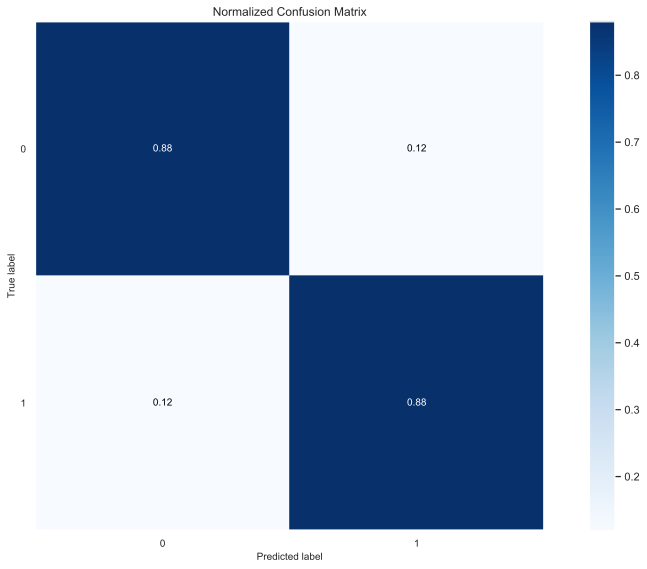

In [76]:
skplt.metrics.plot_confusion_matrix(y_train, y_guess, 
                                    normalize=True, figsize=SIZE)
plt.tight_layout()
plt.show()

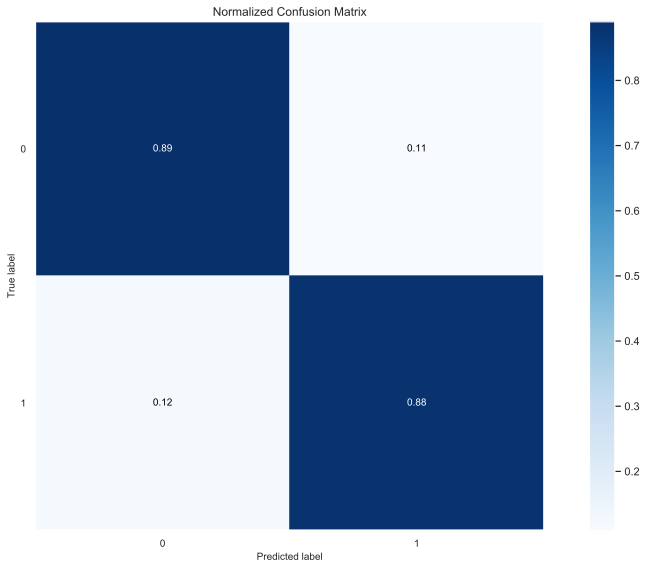

In [77]:
skplt.metrics.plot_confusion_matrix(y_test, y_score, 
                                    normalize=True, figsize=SIZE)
plt.tight_layout()
plt.show()

### Precision / Recall / $F_1$-Score

* https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context)

In [78]:
print("TRAIN:")
print(classification_report(y_train, y_guess))
print("TEST:")
print(classification_report(y_test, y_score))

TRAIN:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1904
           1       0.87      0.88      0.88      1846

   micro avg       0.88      0.88      0.88      3750
   macro avg       0.88      0.88      0.88      3750
weighted avg       0.88      0.88      0.88      3750

TEST:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       596
           1       0.90      0.88      0.89       654

   micro avg       0.88      0.88      0.88      1250
   macro avg       0.88      0.88      0.88      1250
weighted avg       0.88      0.88      0.88      1250



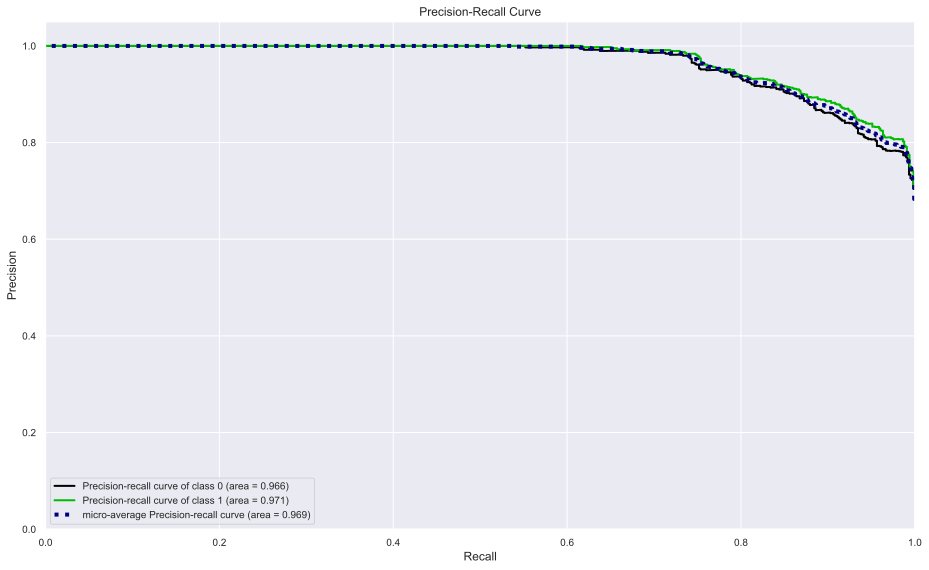

In [79]:
# plot the precision-recall curve
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=SIZE)
plt.tight_layout()
plt.show()

### Tweak the Threshold

Typically we classify an element as *class 1* if the model predicts *class 1* with a probability of fifty percent or greater: $p \geq 0.5$.
But we can always choose to modify this cutoff point (threshold) -and consequently influence the number of False Positives and False Negatives.
Depending on the real-world application of the model it may be appropriate to try to balance the FPs and FNs. Often times you care about minimizing one to some extent (at the cost of the other).
Consider the extreme cases:
* Predict everything to be 0 $\implies$ lots of FNs / no FPs.
* Predict everything to be 1 $\implies$ lots of FPs / no FNs.

Below we will try to measure how tweaking the threshold affects the Precision, Recall, and Accuracy of our model. We do this by using a 10-Fold Validation Scheme.

See here for more on cross-validation:
* https://scikit-learn.org/stable/modules/cross_validation.html

In [80]:
pipe = make_pipeline(Thresholder(model, threshold=0.1))
mod = GridSearchCV(estimator=pipe,
                   param_grid = {"thresholder__threshold": np.linspace(0.1, 0.9, 100)},
                   scoring={"precision": make_scorer(precision_score),
                            "recall": make_scorer(recall_score),
                            "accuracy": make_scorer(accuracy_score)},
                   refit="recall",
                   cv=10)
mod.fit(X_train, y_train);

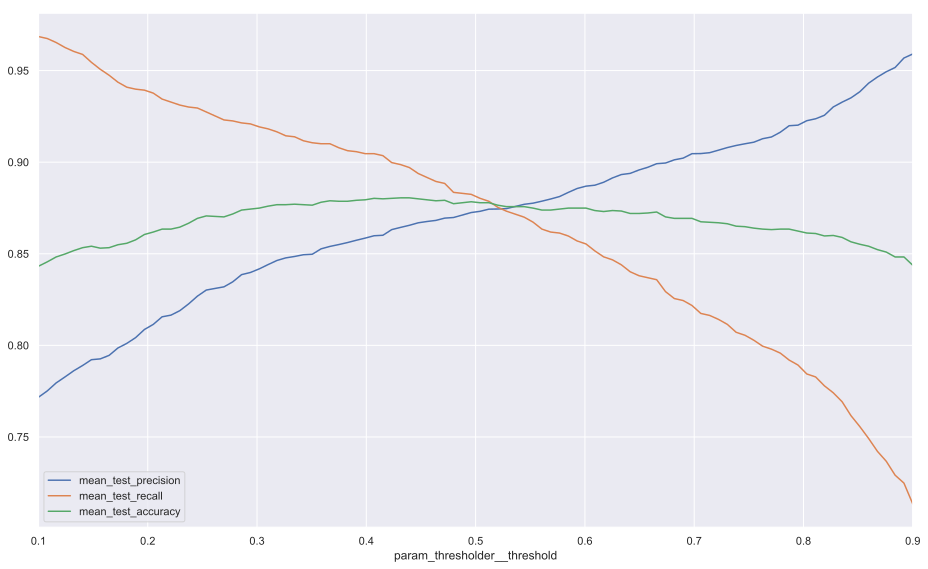

In [81]:
param = "param_thresholder__threshold"
scores = ['mean_test_precision', 'mean_test_recall', 'mean_test_accuracy']

(pd.DataFrame(mod.cv_results_).set_index(param)[scores].plot(figsize=SIZE))
plt.tight_layout()
plt.show()

In [82]:
# new threshold
# thresh = 0.48

# uncomment to test the extremes
thresh = 0.80
# thresh = 0.20

# make predictions on training set
y_guess = model.predict_proba(X_train)[:,1]
y_guess = (y_guess >= thresh).astype(np.int)

# make predictions on hold-out set
y_score = model.predict_proba(X_test)[:,1]
y_score = (y_score >= thresh).astype(np.int)

In [83]:
print("TRAIN:")
print(classification_report(y_train, y_guess))
print("TEST:")
print(classification_report(y_test, y_score))

TRAIN:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1904
           1       0.92      0.79      0.85      1846

   micro avg       0.86      0.86      0.86      3750
   macro avg       0.87      0.86      0.86      3750
weighted avg       0.87      0.86      0.86      3750

TEST:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       596
           1       0.93      0.81      0.87       654

   micro avg       0.87      0.87      0.87      1250
   macro avg       0.88      0.87      0.87      1250
weighted avg       0.88      0.87      0.87      1250



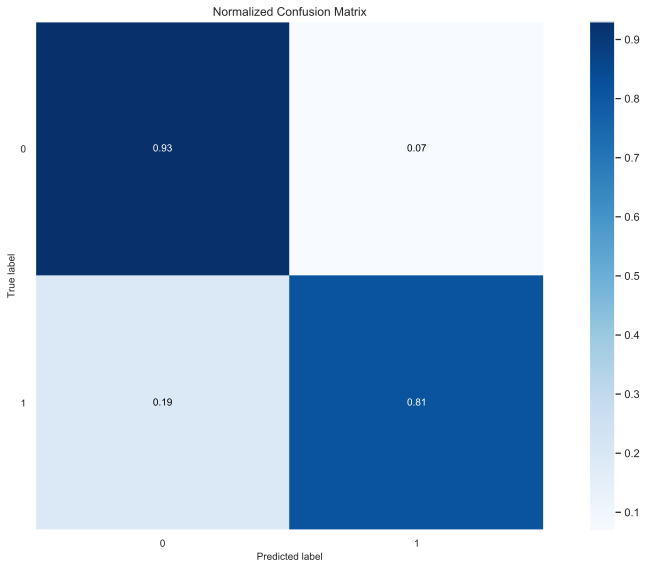

In [84]:
skplt.metrics.plot_confusion_matrix(y_test, y_score, 
                                    normalize=True, figsize=SIZE)
plt.tight_layout()
plt.show()

In [85]:
print("Accuracy Scores")
print("="*len("Accuracy Scores"))
print("TRAIN:",accuracy_score(y_train, y_guess))
print("TEST:",accuracy_score(y_test, y_score))

Accuracy Scores
TRAIN: 0.8624
TEST: 0.8704


### Area Under the Curve

* https://en.wikipedia.org/wiki/Receiver_operating_characteristic#History

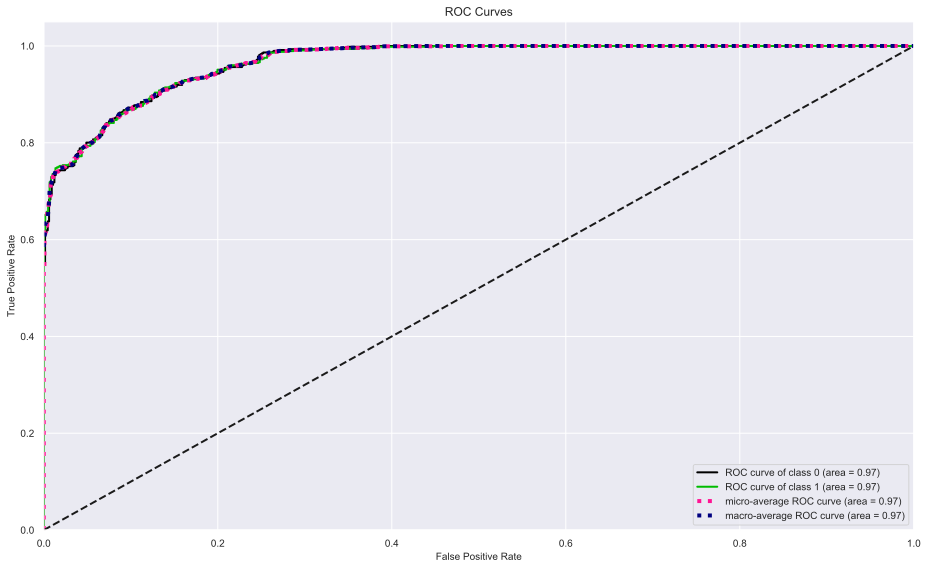

In [86]:
skplt.metrics.plot_roc(y_test, y_probas, figsize=SIZE)
plt.tight_layout()
plt.show()

## Re-Evaluating Model Assumptions

<center><img src='https://i.kym-cdn.com/entries/icons/mobile/000/023/987/overcome.jpg'></center>


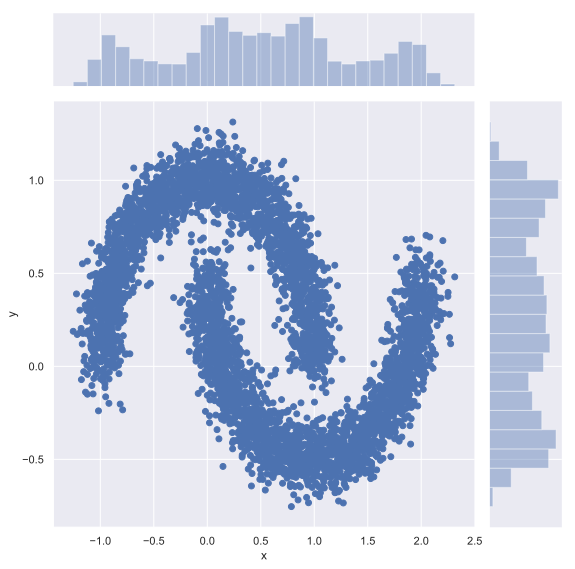

In [87]:
sns.jointplot('x', 'y', df, height=8, ratio=5)
plt.show()

### Gaussian Assumption

We can lift / alter the assumption about our likelihoods by:

* Using mixture models to approximate our distributions,

* Transforming our data to be more Gaussian,

* Etc.

### Naive Assumption

We can lift / alter the assumption about the conditional independence of the variables by:

* Engineering new features which have more independence,

* Modeling the structures of the conditional dependencies,

* Etc.

## GMM Naive Bayes Classifier

In [96]:
# instantiate our model
model = GMMClassifier(n_components=8)

# train the model
model.fit(X_train, y_train)

# make predictions on training set
y_guess = model.predict(X_train)

# make predictions on hold-out set
y_score = model.predict(X_test)

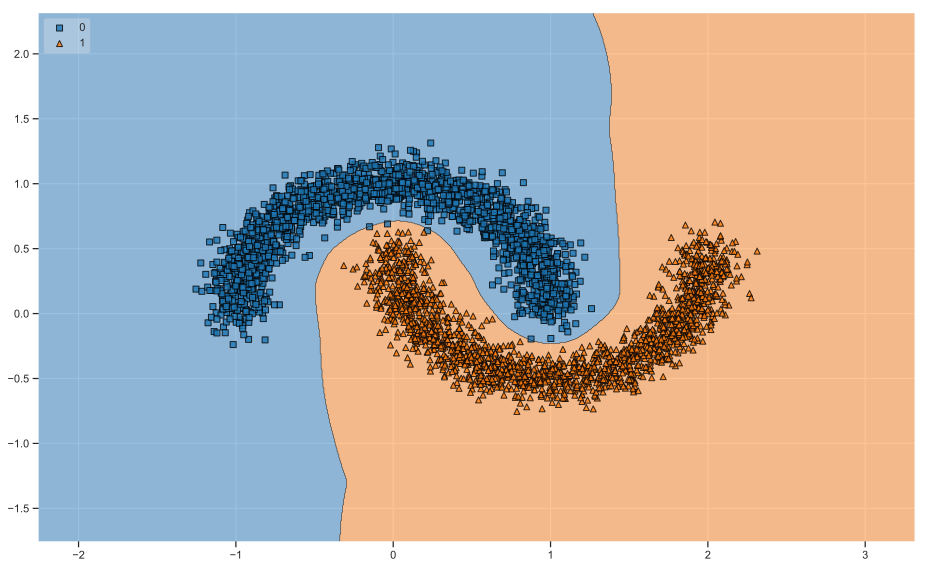

In [97]:
plt.figure(figsize=SIZE)
plot_decision_regions(X=X_train.values, y=y_train.values, clf=model, legend=2)
plt.tight_layout()
plt.show()

In [98]:
print("Accuracy Scores")
print("="*len("Accuracy Scores"))
print("TRAIN:",accuracy_score(y_train, y_guess))
print("TEST:",accuracy_score(y_test, y_score))

Accuracy Scores
TRAIN: 0.9992
TEST: 1.0


## Bayesian Belief Network

Here are a few resources:

* https://en.wikipedia.org/wiki/Bayesian_network
* http://www.homepages.ucl.ac.uk/~ucgtrbd/talks/bayesnetmeetup_causality.pdf

_____

<center><img src='http://www.eotarola.com/wp-content/uploads/2018/02/hansolo.jpg'></center>

_____

Here is a brief introduction to graphical modeling:

* https://en.wikipedia.org/wiki/Graphical_model

We will use a package called PyAgrum for modeling. There are other popular Python packages with similar functionality:

* Pomegranate: https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html
* PGMPy: http://pgmpy.org/models.html#dynamic-bayesian-network
* PyMC3: https://docs.pymc.io/notebooks/multilevel_modeling.html
* BayesPy: http://bayespy.org/intro.html
* BayesBlocks: https://research.cs.aalto.fi/bayes/software/bblocks-1.1-doc.pdf

In [23]:
from sklearn.preprocessing import LabelEncoder as Label

import os
import math
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.bn2roc import showROC

In [24]:
# pyAgrum implements a discrete BBN
#   --we will need to reduce cardinality
used_cols = df.columns.tolist()
df[used_cols].nunique()

x       5000
y       5000
MOON       2
dtype: int64

In [25]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats


class DoubleRecursiveOptimalBin(BaseEstimator, TransformerMixin):
    """
        Take in a 1d array and a set of binary labels (x, y)
        and return the mean y in each of a set of
        'optimal' bins. Does this by first 'growing' bins - adding bins
        where possible -- and then pruning those bins back
        """

    def __init__(self, a=10, max_bins=100):
        """
                Init with 2 args:
                        a        : smoothing factor
                        max_bins : most bins that will be tested
                """
        self.max_bins = max_bins
        self.a = a

    def _lnL(self, bins, x, y):
        """
                Log-likelihood from Hogg 2008
                """

        N, e, _ = stats.binned_statistic(x, statistic="count", values=y, bins=bins)

        d = np.diff(e)

        if any((N + self.a) < 1):
            return np.nan

        s = np.sum(N + self.a)
        L = np.sum(N * np.log((N + self.a - 1) / (d * (s - 1))))

        return L

    def _add_bin(self, pt, bins):
        less = bins[bins < pt]
        more = bins[bins > pt]
        return np.concatenate((less, np.array([pt]), more))

    def _prune_bins(self, bins, x, y):
        L = self._lnL(bins, x, y)
        L_new = L
        bins_new = bins
        while (L_new >= L) and (len(bins_new) > 2):
            # so long as the lgL is increasing, and we have
            # at least 2 bin edges (start and end)
            L = L_new
            bins = bins_new
            Ls = []
            for i in range(1, len(bins) - 1):
                test_bins = bins[:i] + bins[i + 1 :]
                Ls.append(self._lnL(test_bins, x, y))

            L_new = np.nanmax(Ls)
            L_ind = 1 + np.nanargmax(Ls)
            bins_new = bins[:L_ind] + bins[L_ind + 1 :]

        return bins

    def _grow_bins(self, x, y):
        """
        Find the optimal binning for a data set
        Begin with 1 bin, and keep adding bins
        so long as it increases the log-likelihood.
        """
        # make even bins
        bins = np.histogram(x, bins=1)[1]

        grids = set(np.linspace(np.min(x), np.max(x), self.max_bins))

        # get the log L for that, set up loop variables
        L = self._lnL(bins, x, y)
        for g in grids:
            if self._lnL(self._add_bin(g, bins), x, y) > L:
                bins = self._add_bin(g, bins)
                L = self._lnL(bins, x, y)

        return bins

    def _optimal_binning(self, x, y):

        bins = self._grow_bins(x, y)
        return self._prune_bins(list(bins), x, y)

    def fit(self, x, y):
        """
        Get the optimal bin number and create those bins,
        then aggregate the labels accordingly and populate
        self.mu
        """
        self.bins = self._optimal_binning(x, y)

        pdf = lambda a: np.sum(a) / np.sum(y)
        self.mu = stats.binned_statistic(x, statistic=pdf, values=y, bins=self.bins)[0]

        return self

    def transform(self, x):
        """
                get the bin that each x fell into and return
                the mu in corresponding to that bin
                """
        locs = np.digitize(x, self.bins)
        # np hist and digitize handle bins differently
        # so this fudge is required (numpy/issues/9208)
        locs -= 1
        locs[locs == len(self.mu)] -= 1
        return self.mu[locs]

    def fit_transform(self, x, y):
        self.fit(x, y)
        return self.transform(x)


In [26]:
used_cols.remove(target)

# join the target back to the dataframes
X_train[target] = y_train
X_test[target] = y_test

# bin the data
for col in used_cols:
    binner = DoubleRecursiveOptimalBin(max_bins=20)
    binner.fit(X_train[col], X_train[target])
    X_train[col] = binner.transform(X_train[col])
    X_test[col] = binner.transform(X_test[col])
    gc.collect();

In [27]:
# have we have lost too much information / resolution ?
X_train.nunique()

x       9
y       9
MOON    2
dtype: int64

In [28]:
# gum.BayesNet?
# gum.LabelizedVariable?

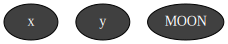

In [29]:
# instantiate a BayesNet object
template = gum.BayesNet()

# label the binned data / convert to string / add info to template
for col in used_cols + [target]:
    encoder = Label()
    encoder.fit(X_train[col])
    X_train[col] = encoder.transform(X_train[col]).astype('str')
    X_test[col] = encoder.transform(X_test[col]).astype('str')
    template.add(gum.LabelizedVariable(col, col, X_train[col].unique()))

# pyAgrum models read from disk
#  --we save the processed data for convenience
file = 'binned_moons.csv'
X_train.to_csv(file, index=False)
X_test.to_csv('test_'+file, index=False)

# show the BN template
gnb.showBN(template, size='10')

In [30]:
# gum.BNLearner?

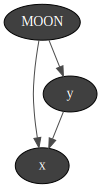

In [31]:
# structural learning --train the model
learner = gum.BNLearner(file, template)
bn = learner.learnBN()
gnb.showBN(bn, size='10')

In [32]:
# gnb.showInference?

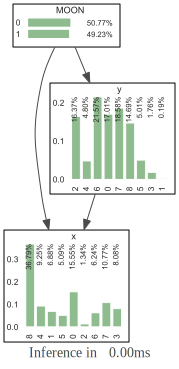

In [33]:
# show the inference diagram
gnb.showInference(bn, size="10")

 binned_moons.csv : [ ######################################################## ] 100%
 result in binned_moons.csv-ROC_unnamed-MOON-1.png


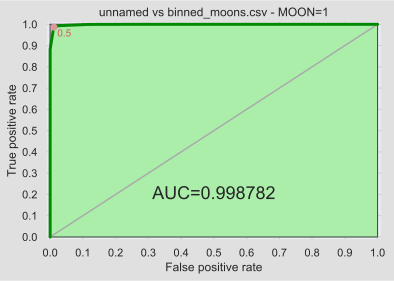

In [34]:
# show the roc curve
showROC(bn, file, target, '1')

In [48]:
thresh = 0.5

In [49]:
# gum.LazyPropagation?

In [50]:
# BBNs can learn from new data and update their beliefs
ie = gum.LazyPropagation(bn)

def init_belief(engine):
    # Initialize evidence
    for var in engine.BN().names():
        if var != target:
            engine.addEvidence(var, 0)

def update_beliefs(engine, bayesNet, row):
    for var in bayesNet.names():
        if var == target:
            continue
        try:
            label = str(row.to_dict()[var])
            idx = bayesNet.variable(var).index(str(row.to_dict()[var]))
            engine.chgEvidence(var, idx)
        except gum.NotFound:
            # this can happend when value is missing is the test base.
            pass        
    engine.makeInference()
    
def is_well_predicted(engine, bayesNet, auc, row):
    update_beliefs(engine, bayesNet, row)
    marginal = engine.posterior(target)
    outcome = row.to_dict()[target]
    if outcome == "0": 
        if marginal.toarray()[1] < auc:
            return "True Positive"
        else:
            return "False Negative"
    else: 
        if marginal.toarray()[1] >= auc:
            return "True Negative"
        else:
            return "False Positive"

In [51]:
ie = gum.LazyPropagation(bn)
init_belief(ie)
ie.addTarget(target)

result = X_test.apply(lambda x: is_well_predicted(ie, bn, thresh, x), axis=1)
result.value_counts(True)

True Negative     0.4688
True Positive     0.4560
False Positive    0.0544
False Negative    0.0208
dtype: float64

In [52]:
positives = sum(result.map(lambda x: 1 if x.startswith("True") else 0 ))
total = result.count()
print("{0:.2f}% good predictions".format(positives/total*100))

92.48% good predictions


In [53]:
# instead of learning the structure we can impose our own
#   --here we will impose the structure of a naive bayes classifier

# instantiate structure string
structure = ''

# create structure string
for col in used_cols:
    str_target = str(bn.variable(target)).replace(',','|').replace('<','{').replace('>','}')
    str_col = str(bn.variable(col)).replace(',','|').replace('<','{').replace('>','}')
    structure += str_target + "->" + str_col + ";"

# final result
structure

'MOON{0|1}->x{8|4|1|5|0|2|6|7|3};MOON{0|1}->y{2|4|6|0|7|8|5|3|1};'

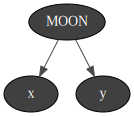

In [54]:
# impose structure
bn = gum.BayesNet()
bn = gum.fastBN(structure)
gnb.showBN(bn, size='10')

In [55]:
# train the model
learner = gum.BNLearner(file, bn)
bn = learner.learnParameters(bn.dag())

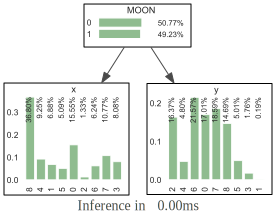

In [56]:
gnb.showInference(bn, size="10")

 binned_moons.csv : [ ######################################################## ] 100%
 result in binned_moons.csv-ROC_unnamed-MOON-1.png


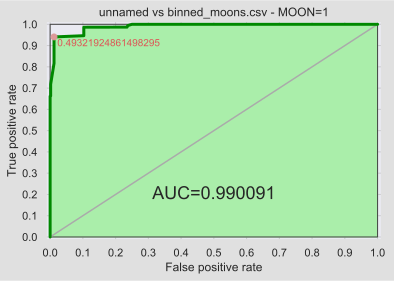

In [57]:
showROC(bn, file, target, '1')

In [64]:
thresh = 0.49

In [65]:
ie=gum.LazyPropagation(bn)
init_belief(ie)
ie.addTarget(target)

result = X_test.apply(lambda x: is_well_predicted(ie, bn, thresh, x), axis=1)
result.value_counts(True)

True Negative     0.5168
True Positive     0.4480
False Negative    0.0288
False Positive    0.0064
dtype: float64

In [66]:
positives = sum(result.map(lambda x: 1 if x.startswith("True") else 0 ))
total = result.count()
print("{0:.2f}% good predictions".format(positives/total*100))

96.48% good predictions


## Resources / References

<center><img src='https://imgs.xkcd.com/comics/modified_bayes_theorem.png'></center>

* The Bayesian Trap: 
    * https://www.youtube.com/watch?v=R13BD8qKeTg


* Bayes Theorem for ML: 
    * https://machinelearningmastery.com/bayes-theorem-for-machine-learning/


* BBN Intro: 
    * https://machinelearningmastery.com/introduction-to-bayesian-belief-networks/


* Naive Bayes Classifier (scikit-learn): 
    * https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes


* GMM Naive Bayes (scikit-lego): 
    * https://scikit-lego.readthedocs.io/en/latest/naive-bayes.html


* Bayesian Belief Network (pyagrum): 
    * https://pyagrum.readthedocs.io/en/0.16.3/